## System setup

---


##### Importing modules


In [1]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import (
    TensorBoard,
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)

from toolkit.classes import DataSet, ImageProcessor, Augmenter, Model

2023-01-29 23:17:46.809241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-29 23:17:49.387032: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-29 23:17:49.387273: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-29 23:17:58.800619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Read dataset

---


##### Create image dataframe


In [2]:
images = DataSet()

In [3]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)


Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 150 images in ./preprocessed/Train/Non defective/
Found 150 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


## Data augmentation

---


In [10]:
N_augmented = 25

In [5]:
image_augmenter = Augmenter(N_augmented, images.data)
image_augmenter.remove_old_data(images.augmented_folder)
image_augmenter.augment_images()
del image_augmenter
images.update_dataset("augmented")
images.augmented


100%|██████████| 25/25 [00:09<00:00,  2.73it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


,type,defect,defect_str,path,filename,img,height,width,components,R_mean,G_mean,B_mean
0,train,0,Non defective,./augmented/Train/Non defective/,83_augmented.jpg,./augmented/Train/Non defective/83_augmented.jpg,0,0,0,0.0,0.0,0.0
1,train,0,Non defective,./augmented/Train/Non defective/,94_augmented.jpg,./augmented/Train/Non defective/94_augmented.jpg,0,0,0,0.0,0.0,0.0
2,train,0,Non defective,./augmented/Train/Non defective/,77_augmented.jpg,./augmented/Train/Non defective/77_augmented.jpg,0,0,0,0.0,0.0,0.0
3,train,0,Non defective,./augmented/Train/Non defective/,102_augmented.jpg,./augmented/Train/Non defective/102_augmented.jpg,0,0,0,0.0,0.0,0.0
4,train,0,Non defective,./augmented/Train/Non defective/,9_augmented.jpg,./augmented/Train/Non defective/9_augmented.jpg,0,0,0,0.0,0.0,0.0
5,train,0,Non defective,./augmented/Train/Non defective/,98_augmented.jpg,./augmented/Train/Non defective/98_augmented.jpg,0,0,0,0.0,0.0,0.0
6,train,0,Non defective,./augmented/Train/Non defective/,45_augmented.jpg,./augmented/Train/Non defective/45_augmented.jpg,0,0,0,0.0,0.0,0.0
7,train,0,Non defective,./augmented/Train/Non defective/,21_augmented.jpg,./augmented/Train/Non defective/21_augmented.jpg,0,0,0,0.0,0.0,0.0
8,train,0,Non defective,./augmented/Train/Non defective/,112_augmented.jpg,./augmented/Train/Non defective/112_augmented.jpg,0,0,0,0.0,0.0,0.0
9,train,0,Non defective,./augmented/Train/Non defective/,117_augmented.jpg,./augmented/Train/Non defective/117_augmented.jpg,0,0,0,0.0,0.0,0.0


## Image processing

---


In [4]:
img_height = 32
img_width = 32

preprocessing_steps = [
    "original",
    "grayscale",
    "hist_eq",
    "noise_filt",
    "resize",
    "save",
]

preprocessing_kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": img_height, "width": img_width},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "noise_filt": {"type": "median", "size": 11},
    "Laplacian": {"size": 5},
    "Canny": {"low": 100, "high": 200},
    "Hough": {"minLineLength": 10, "maxLineGap": 20},
    "feat_detect": {"type": "ORB"},
}


In [5]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
image_processor.process_images(images.augmented)
del image_processor

384it [07:03,  1.10s/it]
50it [00:07,  6.71it/s]


## Model build

---


##### Construct neural network


In [6]:
CNN = Model("LeNet-5")

CNN.epochs = 1000
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=0.00001
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=100,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=2,
        verbose=1,
        mode="auto",
        min_lr=0.000005
    )
]

CNN.load_datasets()
CNN.build_model()
CNN.compile_model()
CNN.model.summary()

2023-01-29 23:25:55.156924: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-29 23:25:55.156989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tomcom): /proc/driver/nvidia/version does not exist
2023-01-29 23:25:55.164916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
    

##### Train


In [21]:
CNN.train_net()

Epoch 1/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.7174 - accuracy: 0.4732 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/LeNet-5.h5
11/11 [==============================] - 1s 27ms/step - loss: 0.7091 - accuracy: 0.5000 - val_loss: 0.7053 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 2/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.7006 - accuracy: 0.4955
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 0s 12ms/step - loss: 0.7001 - accuracy: 0.5000 - val_loss: 0.6995 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 3/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.6962 - accuracy: 0.4922
Epoch 3: val_accuracy improved from 0.50000 to 0.53226, saving model to ./models/LeNet-5.h5
11/11 [==============================] - 0s 14ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6970 - val_accuracy: 0.5323 - lr: 1.0000e-05
Epoch 4/1000
 7/11 [==================

##### Predict


In [22]:
CNN.predict_test()


1/1 [==============================] - 0s 131ms/step
Test values:          [0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1]
Predicted values:     [0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0]


##### Metrics


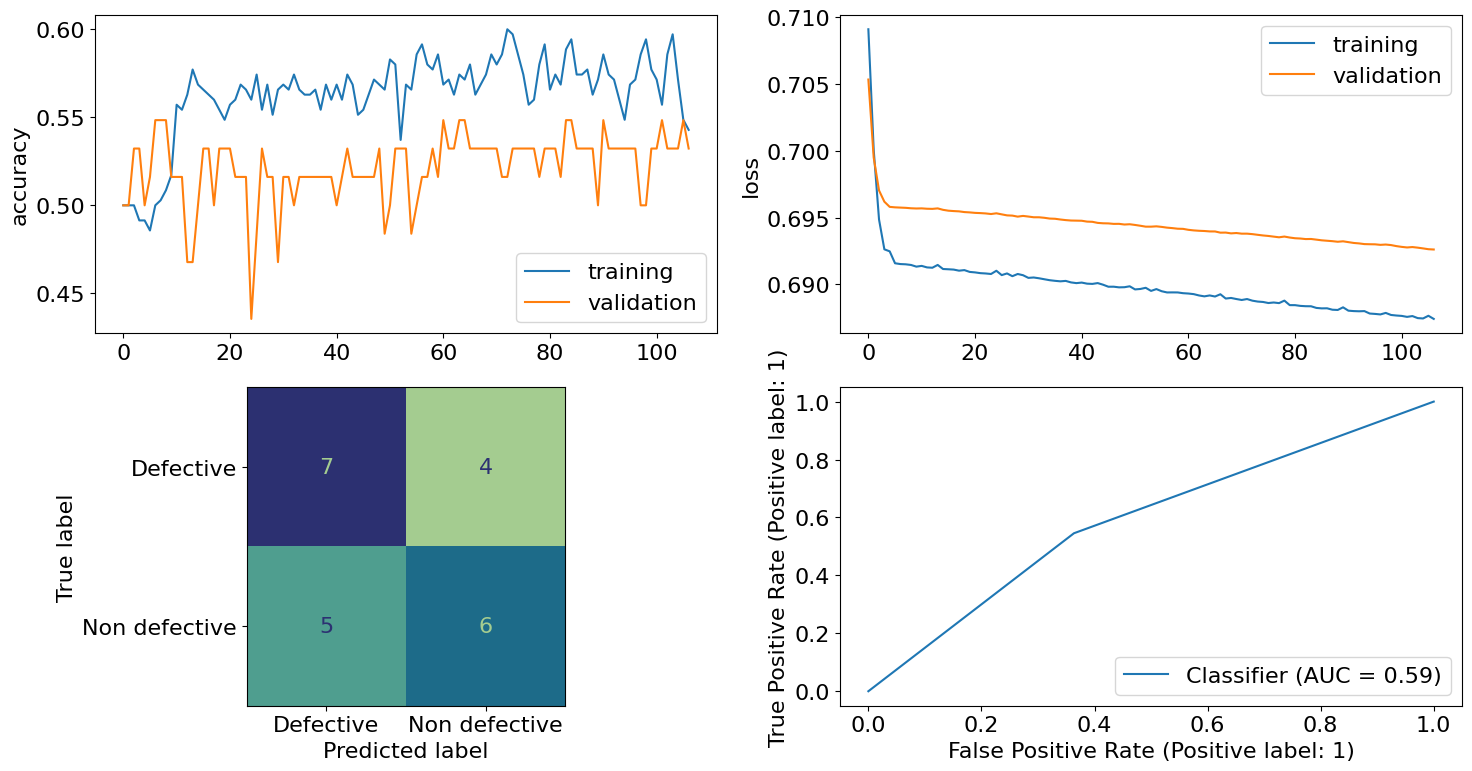

In [23]:
CNN.show_metrics(save_folder=images.plot_folder)


#### Run with tuned learning rate

Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.7133 - accuracy: 0.4886
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/LeNet-5_LR.h5
11/11 [==============================] - 4s 113ms/step - loss: 0.7133 - accuracy: 0.4886 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 2/100
10/11 [==========================>...] - ETA: 0s - loss: 0.6921 - accuracy: 0.5469
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 1s 63ms/step - loss: 0.6925 - accuracy: 0.5457 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4857
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 1s 51ms/step - loss: 0.6939 - accuracy: 0.4857 - val_loss: 0.6915 - val_accuracy: 0.4839
Epoch 4/100


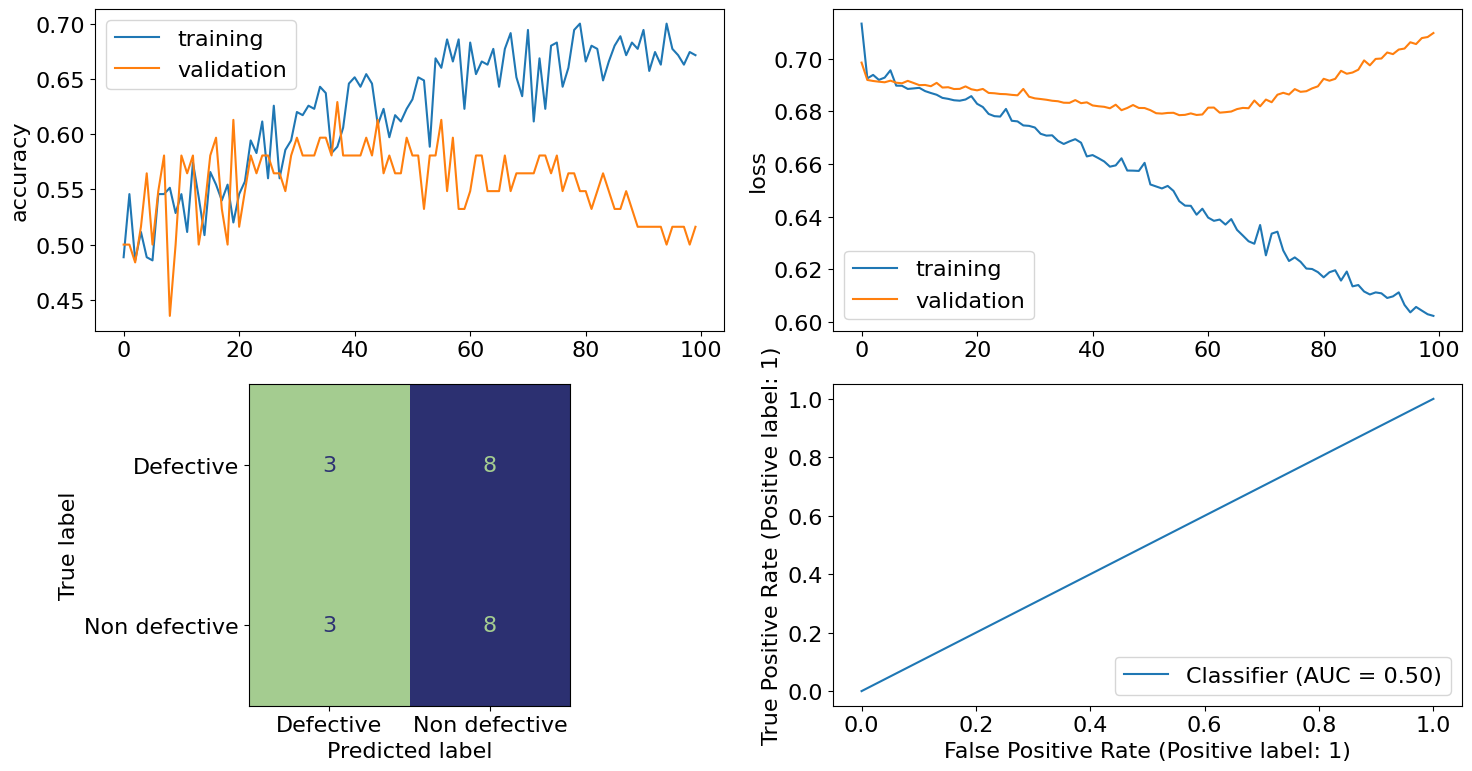

In [24]:
CNN = Model("LeNet-5")

CNN.epochs = 100
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=0.00010406121816929997
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}_LR.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
]

CNN.load_datasets()
CNN.build_model()
CNN.compile_model()
CNN.train_net()
CNN.model.load_weights('./models/LeNet-5_LR.h5')
CNN.predict_test()
CNN.show_metrics(save_folder=images.plot_folder, postfix='LR')

#### Bootstrapping

In [7]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

In [8]:
CNN.remove_augmented_data(images.preprocessed_folder)
images.update_dataset(dataset="preprocessed")

Found 150 images in ./preprocessed/Train/Non defective/
Found 150 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


In [18]:
N_bootstrap = 10
cols = ["loss", "accuracy", "val_loss", "val_accuracy", "test_accuracy"]
results = pd.DataFrame(columns=cols)
single_result = {}

for _ in range(N_bootstrap):
    resampled = images.preprocessed.copy()
    type_list = resampled.type.copy()
    for cl in set(resampled.defect_str):
        indices = np.array(resampled[resampled.defect_str == cl].index)
        np.random.shuffle(indices)
        train_idx = indices[:150]
        validation_idx = indices[150:181]
        test_idx = indices[181:]
        type_list[train_idx] = "train"
        type_list[validation_idx] = "validation"
        type_list[test_idx] = "test"
    resampled.type = type_list

    image_augmenter = Augmenter(N_augmented, images.data)
    image_augmenter.remove_old_data(images.augmented_folder)
    image_augmenter.augment_images()
    del image_augmenter
    images.update_dataset("augmented")
    resampled = pd.concat([resampled, images.augmented]) 

    image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs, save_folder="./augmented/")
    image_processor.process_images(images.augmented)
    del image_processor

    CNN = Model("LeNet-5")
    
    CNN.epochs = 50
    CNN.batch_size = 32

    CNN.optimizer = Adam(
        learning_rate=0.00010406121816929997
    )
    
    CNN.callbacks = [
        TensorBoard(log_dir="./logs", write_images=True),
        ModelCheckpoint(
            f"./models/{CNN.name}_bootstrap.h5",
            monitor="val_accuracy",
            verbose=1,
            save_best_only=True,
            save_weights_only=False,
            mode="auto",
            save_freq="epoch",
        ),
    ]

    CNN.load_datasets(resample=True, df_images=resampled)
    CNN.build_model()
    CNN.compile_model()
    CNN.train_net()
    best_idx = np.argmax(CNN.history.history["val_accuracy"])
    for col in cols[:4]:
        single_result[col] = CNN.history.history[col][best_idx]
    CNN.model.load_weights(f'./models/{CNN.name}_bootstrap.h5')
    
    CNN.predictions = CNN.model.predict(CNN.data["Test"])
    CNN.y_pred = (1 * (CNN.predictions > 0.5)).ravel()
    CNN.y_true = list(CNN.data["Test"][0][-1])
    single_result["test_accuracy"] = accuracy_score(CNN.y_true, CNN.y_pred)
    results = pd.concat([results, pd.DataFrame([single_result])])
    
display(results)
results.describe()

100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:35,  1.41it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6991 - accuracy: 0.4857
Epoch 1: val_accuracy improved from -inf to 0.51613, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 33ms/step - loss: 0.6991 - accuracy: 0.4857 - val_loss: 0.6954 - val_accuracy: 0.5161
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.4971
Epoch 2: val_accuracy improved from 0.51613 to 0.56452, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 0s 19ms/step - loss: 0.6952 - accuracy: 0.4971 - val_loss: 0.6940 - val_accuracy: 0.5645
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.5171
Epoch 3: val_accuracy did not improve from 0.56452
11/11 [=====================

100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:51,  1.03s/it]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.4971
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 33ms/step - loss: 0.6956 - accuracy: 0.4971 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5114
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.5114 - val_loss: 0.6925 - val_accuracy: 0.4839
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5057
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 4/50
10/11 [==========================>...] - ETA: 0s - loss: 0.6965 - accuracy: 0.4748
Epoch 4: val_accuracy improved fr

100%|██████████| 25/25 [00:10<00:00,  2.49it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:53,  1.07s/it]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5600
Epoch 1: val_accuracy improved from -inf to 0.48387, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 33ms/step - loss: 0.6906 - accuracy: 0.5600 - val_loss: 0.7007 - val_accuracy: 0.4839
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5143
Epoch 2: val_accuracy improved from 0.48387 to 0.53226, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5143 - val_loss: 0.6942 - val_accuracy: 0.5323
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.5029
Epoch 3: val_accuracy improved from 0.53226 to 0.54839, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 0s 20ms/step - loss: 0.6880 - accuracy: 0.5029 - val_loss: 0.6940 - val_accuracy: 0.5484
Epoch 4/50
11/11 [=======

100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:50,  1.00s/it]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.4857
Epoch 1: val_accuracy improved from -inf to 0.48387, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 5s 146ms/step - loss: 0.6968 - accuracy: 0.4857 - val_loss: 0.6932 - val_accuracy: 0.4839
Epoch 2/50
10/11 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5189
Epoch 2: val_accuracy improved from 0.48387 to 0.54839, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 78ms/step - loss: 0.6907 - accuracy: 0.5171 - val_loss: 0.6916 - val_accuracy: 0.5484
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5571
Epoch 3: val_accuracy did not improve from 0.54839
11/11 [====================

100%|██████████| 25/25 [00:07<00:00,  3.49it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [01:00,  1.22s/it]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.7060 - accuracy: 0.5029
Epoch 1: val_accuracy improved from -inf to 0.51613, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 34ms/step - loss: 0.7060 - accuracy: 0.5029 - val_loss: 0.6958 - val_accuracy: 0.5161
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.4943
Epoch 2: val_accuracy did not improve from 0.51613
11/11 [==============================] - 0s 17ms/step - loss: 0.6952 - accuracy: 0.4943 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.5257
Epoch 3: val_accuracy improved from 0.51613 to 0.58065, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 0s 20ms/step - loss: 0.6905 - accuracy: 0.5257 - val_loss: 0.6916 - val_accuracy: 0.5806
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6906 -

100%|██████████| 25/25 [00:25<00:00,  1.00s/it]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:46,  1.07it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
 7/11 [==================>...........] - ETA: 0s - loss: 0.6984 - accuracy: 0.4955
Epoch 1: val_accuracy improved from -inf to 0.51613, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 46ms/step - loss: 0.7011 - accuracy: 0.4829 - val_loss: 0.6930 - val_accuracy: 0.5161
Epoch 2/50
 9/11 [=======================>......] - ETA: 0s - loss: 0.6927 - accuracy: 0.5035
Epoch 2: val_accuracy did not improve from 0.51613
11/11 [==============================] - 0s 22ms/step - loss: 0.6937 - accuracy: 0.4914 - val_loss: 0.6917 - val_accuracy: 0.4677
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5086
Epoch 3: val_accuracy did not improve from 0.51613
11/11 [==============================] - 0s 25ms/step - loss: 0.6929 - accuracy

100%|██████████| 25/25 [00:10<00:00,  2.31it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:49,  1.00it/s]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.5114
Epoch 1: val_accuracy improved from -inf to 0.51613, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 33ms/step - loss: 0.6979 - accuracy: 0.5114 - val_loss: 0.6912 - val_accuracy: 0.5161
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.7030 - accuracy: 0.5057
Epoch 2: val_accuracy did not improve from 0.51613
11/11 [==============================] - 0s 16ms/step - loss: 0.7030 - accuracy: 0.5057 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.4943
Epoch 3: val_accuracy did not improve from 0.51613
11/11 [==============================] - 0s 17ms/step - loss: 0.6918 - accuracy: 0.4943 - val_loss: 0.6917 - val_accuracy: 0.4839
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.5714
Epoch 4: val_accuracy improved fr

100%|██████████| 25/25 [00:07<00:00,  3.46it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:52,  1.06s/it]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4971
Epoch 1: val_accuracy improved from -inf to 0.40323, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 33ms/step - loss: 0.6941 - accuracy: 0.4971 - val_loss: 0.6959 - val_accuracy: 0.4032
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.4943
Epoch 2: val_accuracy improved from 0.40323 to 0.53226, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 0s 19ms/step - loss: 0.6921 - accuracy: 0.4943 - val_loss: 0.6951 - val_accuracy: 0.5323
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5429
Epoch 3: val_accuracy did not improve from 0.53226
11/11 [==============================] - 0s 18ms/step - loss: 0.6907 - accuracy: 0.5429 - val_loss: 0.6944 - val_accuracy: 0.3871
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6899 -

100%|██████████| 25/25 [00:07<00:00,  3.54it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:56,  1.13s/it]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
 8/11 [====================>.........] - ETA: 0s - loss: 0.6995 - accuracy: 0.4805
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 1s 36ms/step - loss: 0.6998 - accuracy: 0.4743 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.5057
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 0s 17ms/step - loss: 0.6977 - accuracy: 0.5057 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/50
10/11 [==========================>...] - ETA: 0s - loss: 0.6955 - accuracy: 0.4654
Epoch 3: val_accuracy improved from 0.50000 to 0.51613, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 0s 20ms/step - loss: 0.6948 - accuracy: 0.4743 - val_loss: 0.6935 - val_accuracy: 0.5161
Epoch 4/50
10/11 [==========================>...] - ETA: 0s - loss: 0.6926 -

100%|██████████| 25/25 [00:29<00:00,  1.17s/it]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:46,  1.07it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6992 - accuracy: 0.4800
Epoch 1: val_accuracy improved from -inf to 0.53226, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 2s 54ms/step - loss: 0.6992 - accuracy: 0.4800 - val_loss: 0.6913 - val_accuracy: 0.5323
Epoch 2/50
10/11 [==========================>...] - ETA: 0s - loss: 0.6947 - accuracy: 0.5031
Epoch 2: val_accuracy improved from 0.53226 to 0.58065, saving model to ./models/LeNet-5_bootstrap.h5
11/11 [==============================] - 0s 33ms/step - loss: 0.6960 - accuracy: 0.4943 - val_loss: 0.6909 - val_accuracy: 0.5806
Epoch 3/50
10/11 [==========================>...] - ETA: 0s - loss: 0.6935 - accuracy: 0.5063
Epoch 3: val_accuracy did not improve from 0.58065
11/11 [=====================

,loss,accuracy,val_loss,val_accuracy,test_accuracy
0,0.689450,0.531429,0.693051,0.612903,0.454545
0,0.671344,0.605714,0.660118,0.725806,0.590909
0,0.652480,0.648571,0.685810,0.596774,0.363636
0,0.675055,0.588571,0.686498,0.645161,0.318182
0,0.659238,0.620000,0.664527,0.725806,0.500000
0,0.607941,0.691429,0.771830,0.532258,0.409091
0,0.686694,0.571429,0.691390,0.580645,0.545455
0,0.660101,0.640000,0.680688,0.612903,0.363636
0,0.679977,0.585714,0.672149,0.693548,0.681818
0,0.626297,0.640000,0.640232,0.677419,0.681818


,loss,accuracy,val_loss,val_accuracy,test_accuracy
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.660858,0.612286,0.684629,0.640323,0.490909
std,0.026310,0.045576,0.034758,0.064539,0.131740
min,0.607941,0.531429,0.640232,0.532258,0.318182
25%,0.654169,0.586429,0.666433,0.600806,0.375000
50%,0.665723,0.612857,0.683249,0.629032,0.477273
75%,0.678746,0.640000,0.690167,0.689516,0.579545
max,0.689450,0.691429,0.771830,0.725806,0.681818
